Step 1: Import required libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

Step 2: Load the dataset

In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Suicide_bombing_attacks.csv")

Saving Suicide_bombing_attacks.csv to Suicide_bombing_attacks.csv


Step 3: Initial Exploration

In [5]:
print(df.head())

                      Date                   Islamic Date Blast Day Type  \
0  Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1   Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2     Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3      Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4       Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   

  Holiday Type         Time       City  Latitude Longitude     Province  \
0      Weekend          NaN  Islamabad   33.7180   73.0718      Capital   
1          NaN          NaN    Karachi   24.9918   66.9911        Sindh   
2          NaN      7:45 AM   Karachi    24.9918   66.9911        Sindh   
3          NaN  11:10:00 AM    Karachi   24.9918   66.9911        Sindh   
4          NaN          NaN     Quetta   30.2095   67.0182  Baluchistan   

                                            Location  ...  \
0                              

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [7]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64


Step 4: Parse date column and create year column

In [8]:
df['Parsed Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Parsed Date'].dt.year

Step 5: Plot number of attacks per year

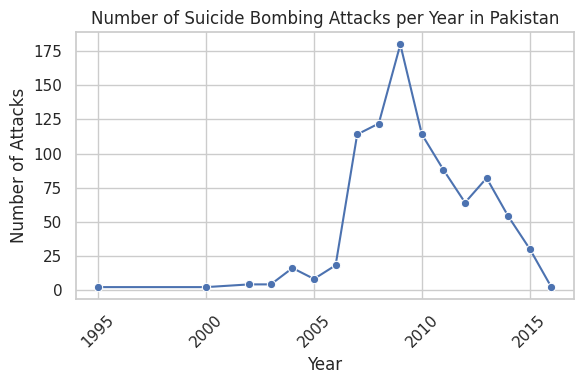

In [13]:
attacks_per_year = df['Year'].value_counts().sort_index()
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title("Number of Suicide Bombing Attacks per Year in Pakistan")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Step 6: Top 10 affected cities

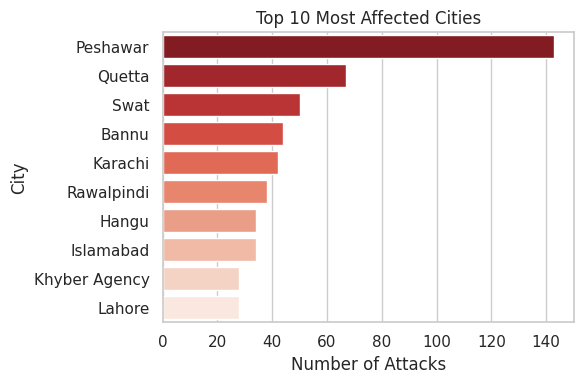

In [16]:
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")
plt.title("Top 10 Most Affected Cities")
plt.xlabel("Number of Attacks")
plt.ylabel("City")
plt.tight_layout()
plt.show()

Step 7: Casualties over time

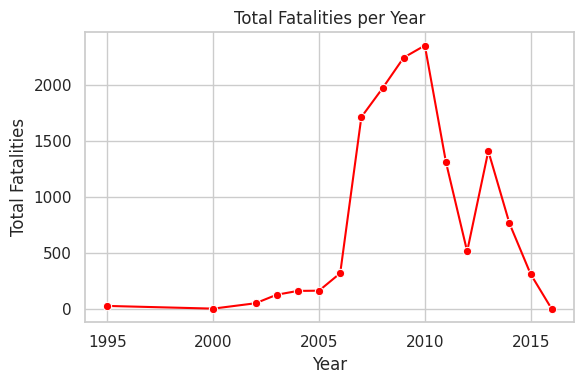

In [17]:
df['Killed Max'] = pd.to_numeric(df['Killed Max'], errors='coerce')
yearly_killed = df.groupby('Year')['Killed Max'].sum()

sns.lineplot(x=yearly_killed.index, y=yearly_killed.values, marker='o', color='red')
plt.title("Total Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.grid(True)
plt.tight_layout()
plt.show()

Step 8: Target type distribution

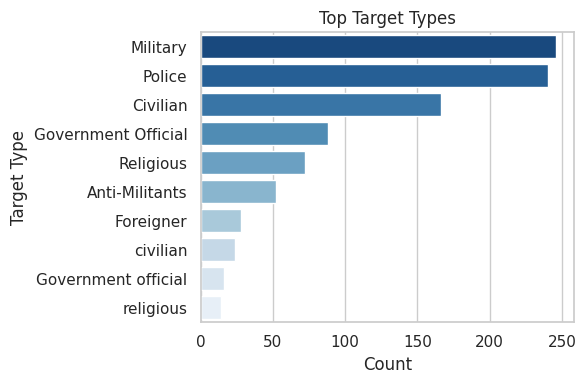

In [22]:
if 'Target Type' in df.columns:
    target_counts = df['Target Type'].value_counts().head(10)
    sns.barplot(y=target_counts.index, x=target_counts.values, palette='Blues_r')
    plt.title("Top Target Types")
    plt.xlabel("Count")
    plt.ylabel("Target Type")
    plt.tight_layout()
    plt.show()